<a href="https://colab.research.google.com/github/darstar45/Machine-Learning/blob/main/Student_Score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

## Load and Explore the Dataset

In [13]:
# Upload the dataset
uploaded = files.upload()

# Read the dataset
df = pd.read_csv('Modified_Student_Scores.csv')
print("\n=== Dataset successfully loaded ===")
print("\nFirst 5 rows:")
print(df.head())

Saving Student_Dataset.csv to Student_Dataset.csv

=== Dataset successfully loaded ===

First 5 rows:
   Hours  Scores
0    2.5    21.0
1    5.1    47.0
2    3.2    90.0
3    8.5    75.0
4    3.5    30.0


## Data Cleaning and Visualization


=== Missing Values ===
Hours     0
Scores    0
dtype: int64


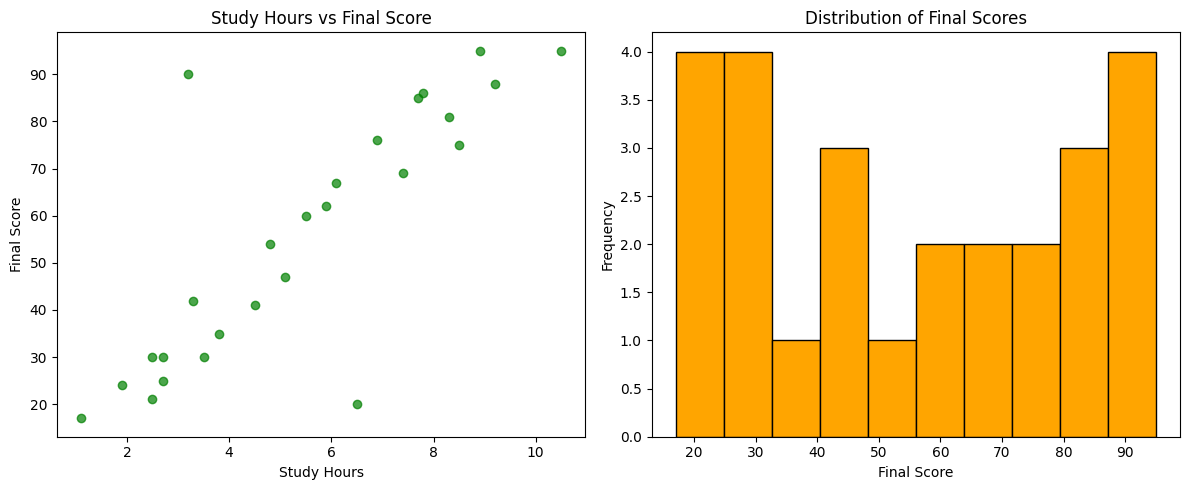

In [14]:
# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# Basic Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Hours'], df['Scores'], alpha=0.7, color='green')
plt.title('Study Hours vs Final Score')
plt.xlabel('Study Hours')
plt.ylabel('Final Score')

plt.subplot(1, 2, 2)
plt.hist(df['Scores'], bins=10, edgecolor='black', color='orange')
plt.title('Distribution of Final Scores')
plt.xlabel('Final Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Prepare Data for Modeling

In [15]:
# Split the dataset
X = df[['Hours']]
y = df['Scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 20 samples
Test set size: 6 samples


## Linear Regression Model


=== Linear Regression ===
Coefficients: [7.77335609]
Intercept: 13.819006930452773
Mean Squared Error: 67.12
R-squared: 0.91


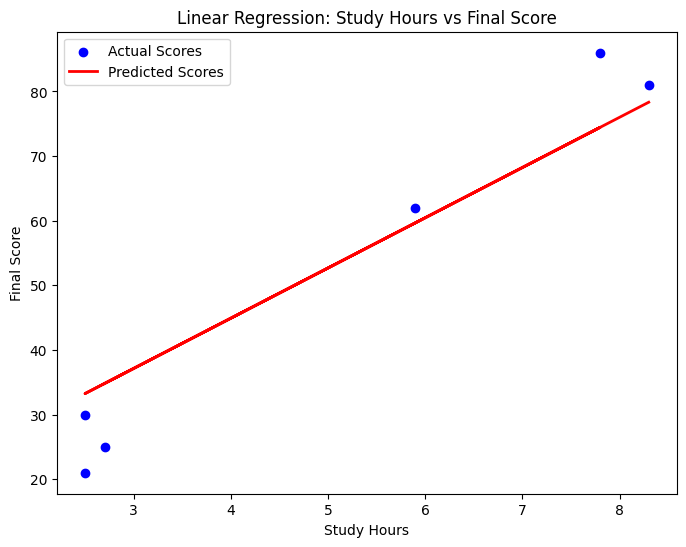

In [16]:
# Train model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\n=== Linear Regression ===")
print(f"Coefficients: {linear_model.coef_}")
print(f"Intercept: {linear_model.intercept_}")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}")

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Predicted Scores')
plt.title('Linear Regression: Study Hours vs Final Score')
plt.xlabel('Study Hours')
plt.ylabel('Final Score')
plt.legend()
plt.show()

## Polynomial Regression Model


=== Degree 2 Polynomial Regression ===
Mean Squared Error: 75.00
R-squared: 0.89


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


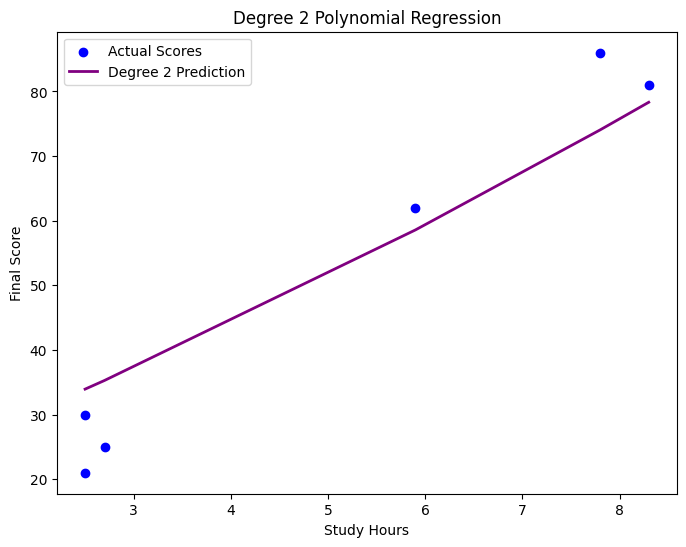


=== Degree 3 Polynomial Regression ===
Mean Squared Error: 94.08
R-squared: 0.87


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


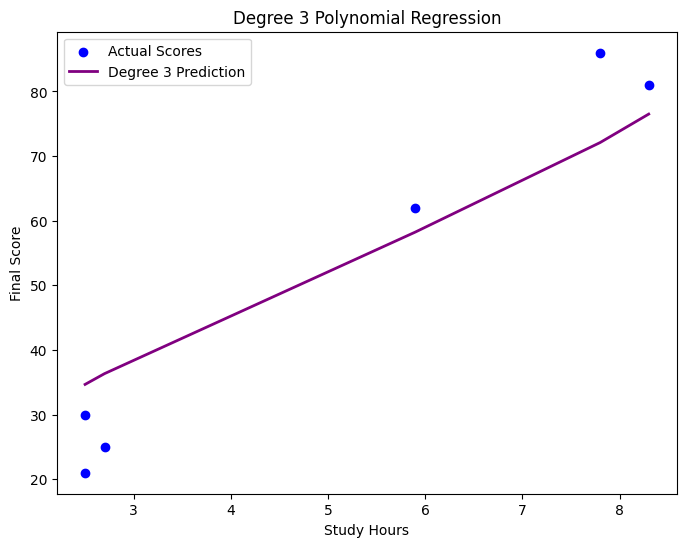


=== Degree 4 Polynomial Regression ===
Mean Squared Error: 162.42
R-squared: 0.77


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


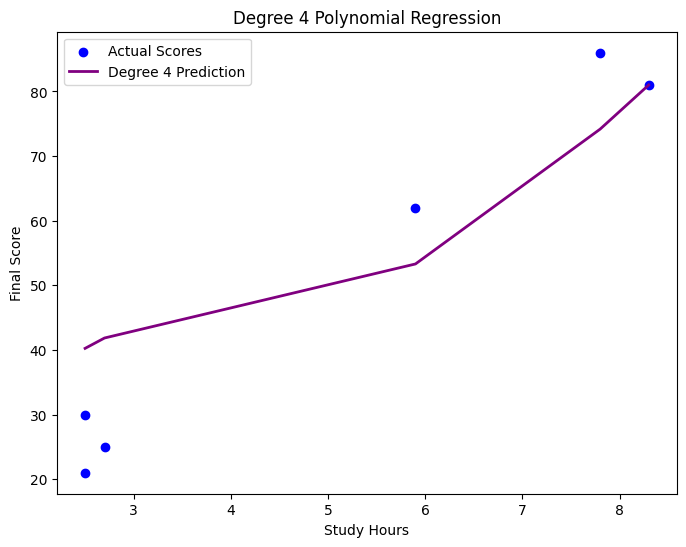

In [17]:
degrees = [2, 3, 4]  # Trying different polynomial degrees
best_degree = None
best_r2 = -np.inf
best_model = None

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Train model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Make predictions
    y_pred_poly = poly_model.predict(X_test_poly)

    # Evaluate model
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f"\n=== Degree {degree} Polynomial Regression ===")
    print(f"Mean Squared Error: {mse_poly:.2f}")
    print(f"R-squared: {r2_poly:.2f}")

    # Track best model
    if r2_poly > best_r2:
        best_r2 = r2_poly
        best_degree = degree
        best_model = poly_model

    # Visualize
    X_test_sorted = np.sort(X_test.values, axis=0)
    y_pred_poly_sorted = poly_model.predict(poly_features.transform(X_test_sorted))

    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual Scores')
    plt.plot(X_test_sorted, y_pred_poly_sorted, color='purple', linewidth=2,
             label=f'Degree {degree} Prediction')
    plt.title(f'Degree {degree} Polynomial Regression')
    plt.xlabel('Study Hours')
    plt.ylabel('Final Score')
    plt.legend()
    plt.show()

## Model Comparison and Final Selection


=== Model Comparison ===


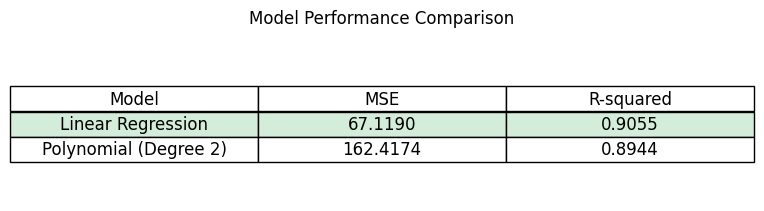


Conclusion: Linear regression performed better than polynomial regression.

Predicted score for 4.5 study hours: 48.8


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [18]:
print("\n=== Model Comparison ===")

# Create comparison data
comparison_data = [
    ["Linear Regression", f"{mse_linear:.4f}", f"{r2_linear:.4f}"],
    [f"Polynomial (Degree {best_degree})", f"{mse_poly:.4f}", f"{best_r2:.4f}"]
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')

# Create table
table = ax.table(
    cellText=comparison_data,
    colLabels=["Model", "MSE", "R-squared"],
    loc='center',
    cellLoc='center'
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Highlight the better model
if best_r2 > r2_linear:
    table[(2, 0)].set_facecolor('#d4edda')
    table[(2, 1)].set_facecolor('#d4edda')
    table[(2, 2)].set_facecolor('#d4edda')
else:
    table[(1, 0)].set_facecolor('#d4edda')
    table[(1, 1)].set_facecolor('#d4edda')
    table[(1, 2)].set_facecolor('#d4edda')

plt.title("Model Performance Comparison", y=1.1)
plt.show()

if best_r2 > r2_linear:
    print("\nConclusion: Polynomial regression performed better than linear regression.")
    final_model = best_model
    final_degree = best_degree
else:
    print("\nConclusion: Linear regression performed better than polynomial regression.")
    final_model = linear_model
    final_degree = 1

# Example prediction
example_hours = [[4.5]]
if final_degree > 1:
    poly_features = PolynomialFeatures(degree=final_degree)
    example_poly = poly_features.fit_transform(example_hours)
    predicted_score = final_model.predict(example_poly)
else:
    predicted_score = final_model.predict(example_hours)

print(f"\nPredicted score for {example_hours[0][0]} study hours: {predicted_score[0]:.1f}")

## Residual Analysis

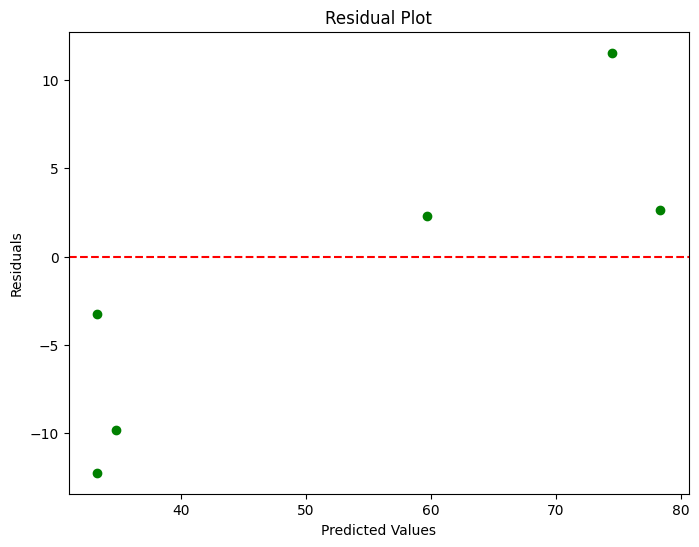

In [19]:
if final_degree > 1:
    poly_features = PolynomialFeatures(degree=final_degree)
    X_test_poly = poly_features.transform(X_test)
    y_pred = final_model.predict(X_test_poly)
else:
    y_pred = final_model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()